## Customer Churn Prediction

##### Objective: This project aims to predict customer churn by leveraging customer data and advanced machine learning techniques. The final model will be deployed using FastAPI, enabling real-time predictions through an interactive API interface.

## Import Data

In [1]:
#!pip uninstall numpy
#!pip install numpy==2.0.0 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score
from tabulate import tabulate
from sklearn.preprocessing import RobustScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

file_path = '/content/drive/MyDrive/data_1C.csv'
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,29,technician,single,basic.9y,no,yes,no,cellular,nov,wed,648.0,1,999,0,nonexistent,no
1,1,31,admin.,single,university.degree,no,no,no,cellular,aug,wed,295.0,1,999,0,nonexistent,no
2,2,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,236.0,2,999,0,nonexistent,no
3,3,30,services,married,unknown,no,no,no,telephone,may,wed,143.0,3,999,0,nonexistent,no
4,4,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155.0,1,999,0,nonexistent,no


In [29]:
df.tail(10)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
8227,8227,76,retired,married,university.degree,no,yes,yes,cellular,dec,thu,330.0,2,4,2,success,yes
8228,8228,36,technician,married,high.school,no,yes,no,cellular,aug,wed,53.0,3,999,0,nonexistent,no
8229,8229,35,admin.,single,university.degree,no,yes,no,cellular,apr,wed,58.0,1,999,0,nonexistent,no
8230,8230,58,blue-collar,married,basic.9y,no,yes,no,cellular,nov,tue,180.0,1,999,1,failure,no
8231,8231,46,technician,divorced,basic.4y,unknown,yes,no,cellular,nov,tue,262.0,2,999,0,nonexistent,no
8232,8232,33,admin.,single,university.degree,no,no,no,telephone,may,tue,147.0,1,999,0,nonexistent,no
8233,8233,39,blue-collar,married,basic.9y,no,no,no,telephone,may,mon,793.0,5,999,0,nonexistent,no
8234,8234,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120.0,2,999,0,nonexistent,no
8235,8235,50,admin.,married,university.degree,no,yes,yes,cellular,nov,fri,189.0,2,999,1,failure,no
8236,8236,29,admin.,single,university.degree,no,yes,no,telephone,may,wed,713.0,1,999,0,nonexistent,no


In [28]:
df.describe()

,Unnamed: 0,age,duration,campaign,pdays,previous
count,8237.000000,8237.000000,8222.000000,8237.000000,8237.000000,8237.000000
mean,4118.000000,40.000486,260.189370,2.555299,962.352434,0.172393
std,2377.961417,10.331078,254.942835,2.663180,187.221927,0.481973
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000
25%,2059.000000,32.000000,103.000000,1.000000,999.000000,0.000000
50%,4118.000000,38.000000,183.000000,2.000000,999.000000,0.000000
75%,6177.000000,47.000000,324.000000,3.000000,999.000000,0.000000
max,8236.000000,98.000000,3284.000000,43.000000,999.000000,6.000000


## Data Visualization

### Distribution of Target Variable

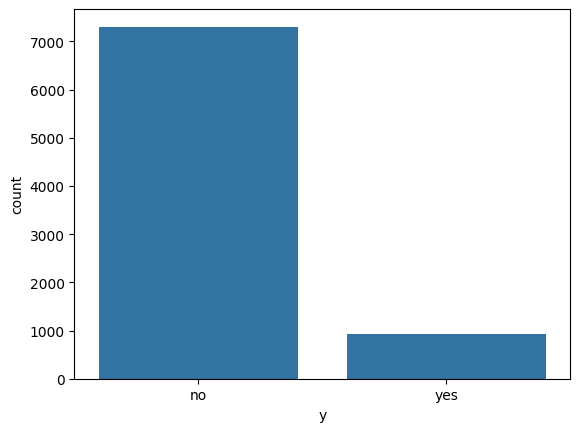

In [5]:
sns.countplot(x='y', data=df)
plt.show()

### Numerical Data

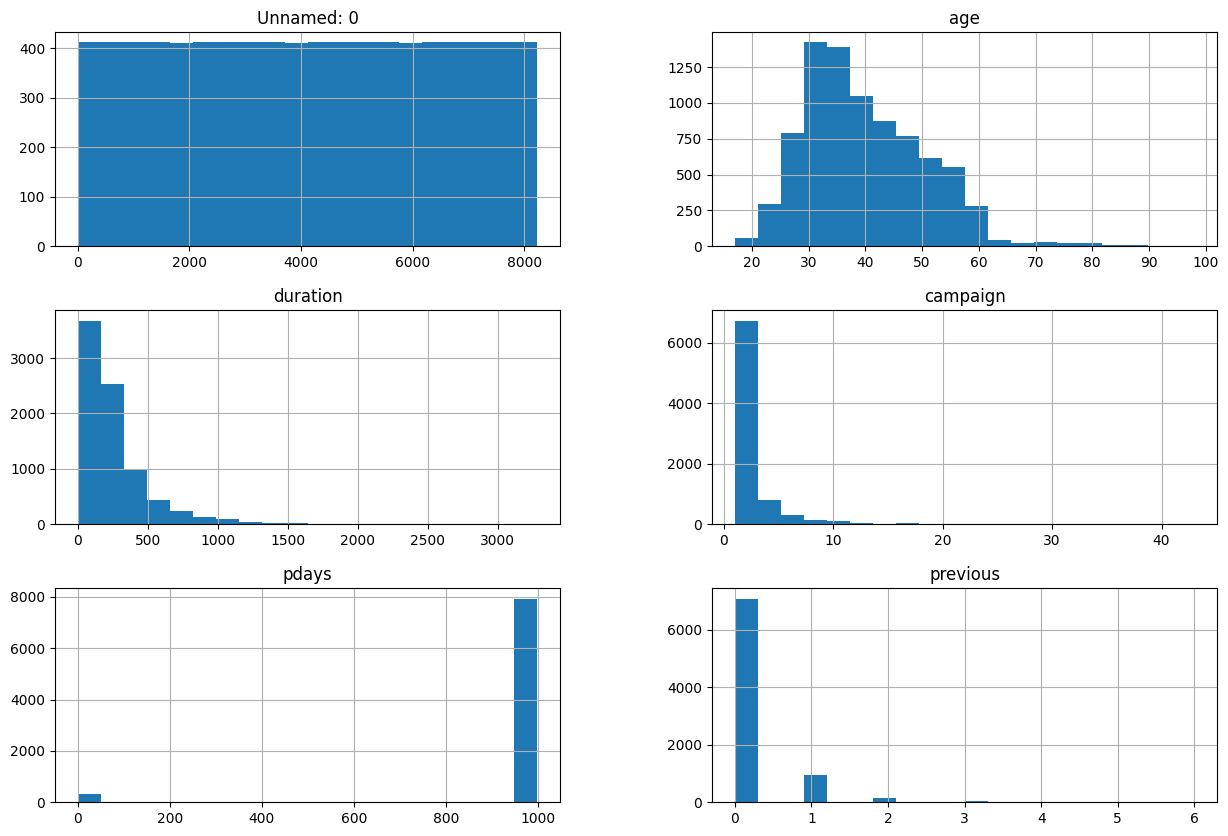

In [6]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

### Categorical Data

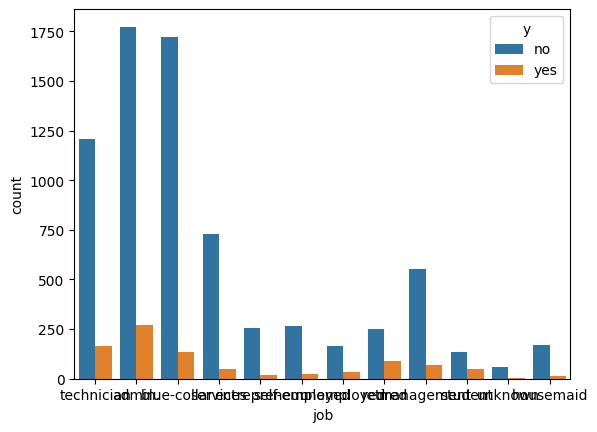

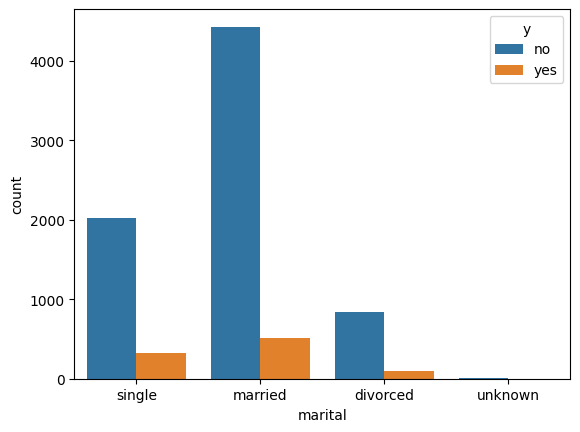

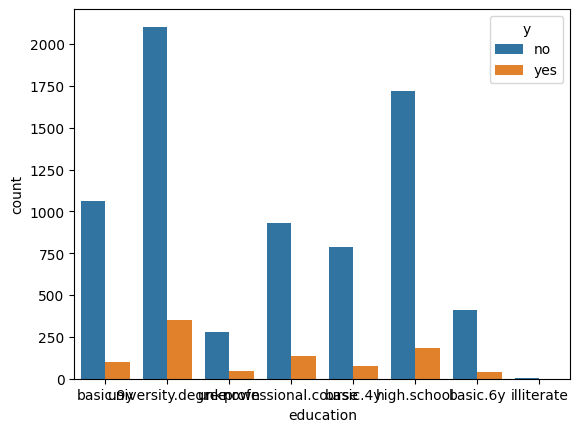

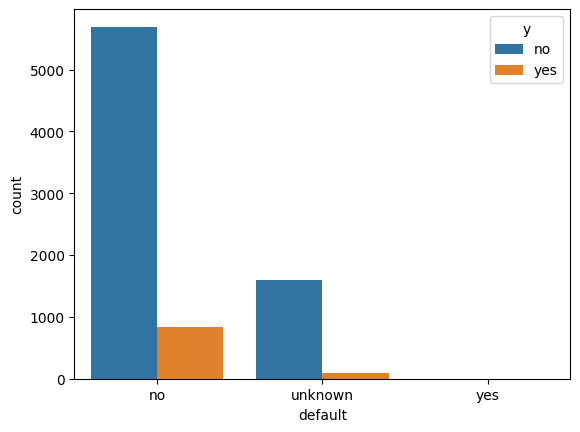

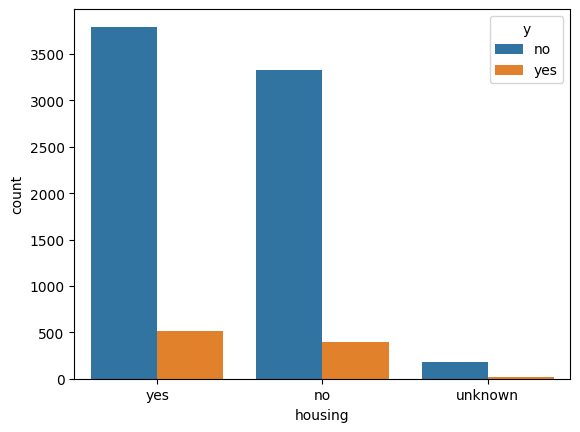

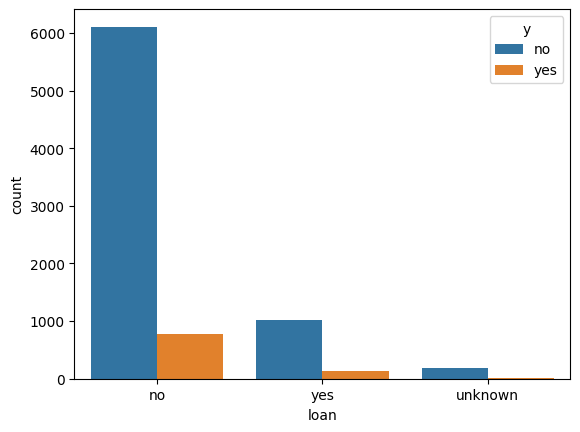

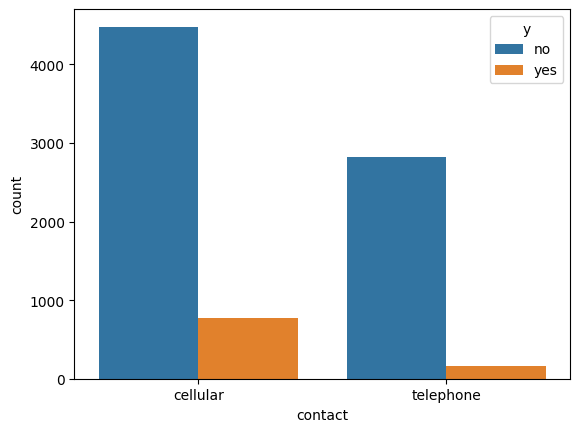

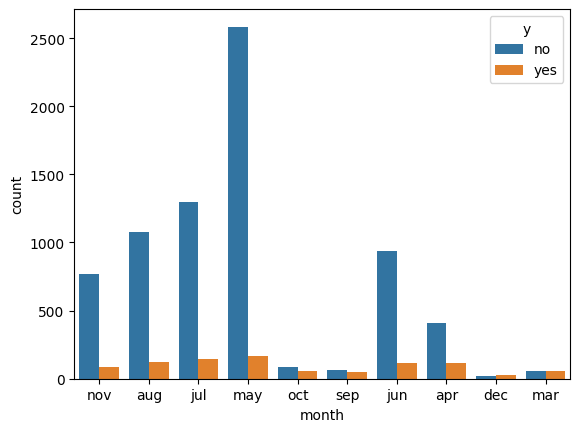

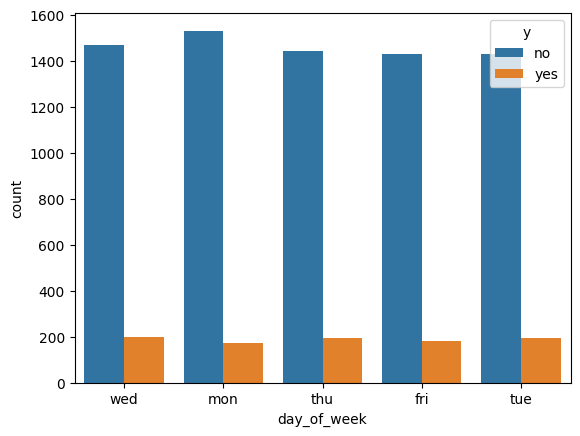

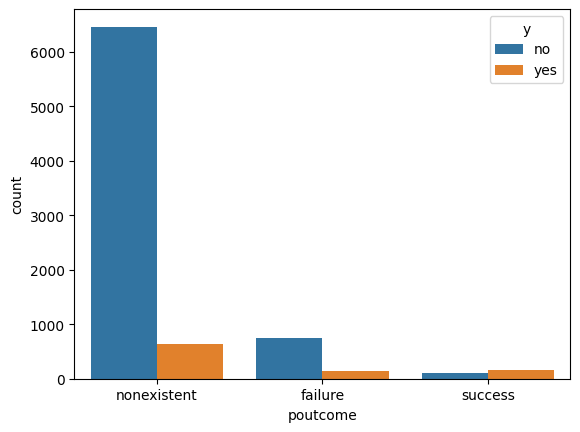

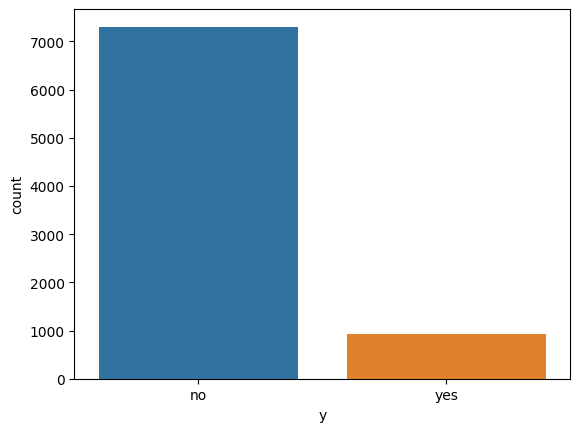

In [7]:
for column in df.select_dtypes(include=['object']).columns:
    sns.countplot(x=column, hue='y', data=df)
    plt.show()

## Data Splitting

We begin by splitting the data to ensure that no information leaks into the test set later

In [8]:
X = df.drop(['y', 'Unnamed: 0'], axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

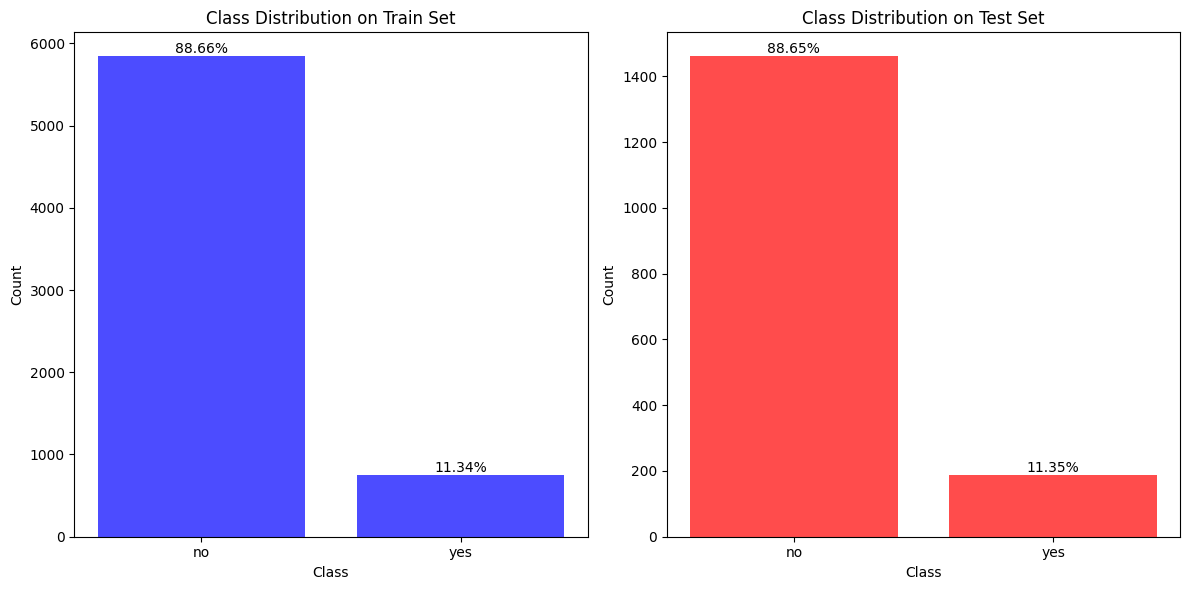

In [9]:
train_distribution = y_train.value_counts()
test_distribution = y_test.value_counts()
train_percentage = (train_distribution / train_distribution.sum()) * 100
test_percentage = (test_distribution / test_distribution.sum()) * 100

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

bars = ax[0].bar(train_distribution.index, train_distribution.values, color='b', alpha=0.7)
ax[0].set_title('Class Distribution on Train Set')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')
for bar, percentage in zip(bars, train_percentage):
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

bars = ax[1].bar(test_distribution.index, test_distribution.values, color='r', alpha=0.7)
ax[1].set_title('Class Distribution on Test Set')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')
for bar, percentage in zip(bars, test_percentage):
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Data Preprocessing

### Missing Values

In [10]:
missing_values_X_train = X_train.isnull().sum()
print("Missing values in X_train:")
print(missing_values_X_train)
print("\n")

missing_values_X_test = X_test.isnull().sum()
print("Missing values in X_test:")
print(missing_values_X_test)
print("\n")

missing_values_y_train = y_train.isnull().sum()
print("Missing values in y_train:")
print(missing_values_y_train)
print("\n")

missing_values_y_test = y_test.isnull().sum()
print("Missing values in y_test:")
print(missing_values_y_test)

Missing values in X_train:
age             0
job             7
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration       14
campaign        0
pdays           0
previous        0
poutcome        0
dtype: int64


Missing values in X_test:
age            0
job            3
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       1
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


Missing values in y_train:
0


Missing values in y_test:
0


We can see that there are missing values in `job` and `duration` columns

### Imputation Functions

Next, we create a function to detect outliers and another to impute missing values. If outliers are detected, we impute using the median; if no outliers are found, we use the mean. For non-numeric features, we impute with the mode

In [11]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

def impute_missing_values(data, outliers):
    for column in data.columns:
        if column in numeric_features:
            if outliers[column].sum() > 0:
                median_value = data[column].median()
                data[column].fillna(median_value, inplace=True)
            else:
                mean_value = data[column].mean()
                data[column].fillna(mean_value, inplace=True)
        else:
            most_frequent_value = data[column].mode()[0]
            data[column].fillna(most_frequent_value, inplace=True)
    return data

In [12]:
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous']
outliers_X_train = X_train[numeric_features].apply(detect_outliers)
print("Outliers in X_train:")
print(outliers_X_train.sum())

outliers_X_test = X_test[numeric_features].apply(detect_outliers)
print("Outliers in X_test:")
print(outliers_X_test.sum())

Outliers in X_train:
age          65
duration    474
campaign    384
pdays       243
previous    923
dtype: int64
Outliers in X_test:
age          19
duration    111
campaign    105
pdays        61
previous    227
dtype: int64


In [13]:
X_train = impute_missing_values(X_train, outliers_X_train)
X_test = impute_missing_values(X_test, outliers_X_train)

print("Missing values in X_train after imputation:")
print(X_train.isnull().sum())
print("\n")
print("Missing values in X_test after imputation:")
print(X_test.isnull().sum())

Missing values in X_train after imputation:
age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


Missing values in X_test after imputation:
age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


After the imputation, we can see that there are no more missing values in all of the columns

### Encoding

Now we see the value counts first

In [14]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for job:
job
admin.           2046
blue-collar      1860
technician       1375
services          777
management        625
retired           339
self-employed     293
entrepreneur      279
unemployed        201
housemaid         188
student           181
unknown            63
Name: count, dtype: int64


Value counts for marital:
marital
married     4943
single      2345
divorced     936
unknown       13
Name: count, dtype: int64


Value counts for education:
education
university.degree      2456
high.school            1902
basic.9y               1157
professional.course    1070
basic.4y                862
basic.6y                456
unknown                 328
illiterate                6
Name: count, dtype: int64


Value counts for default:
default
no         6533
unknown    1701
yes           3
Name: count, dtype: int64


Value counts for housing:
housing
yes        4308
no         3730
unknown     199
Name: count, dtype: int64


Value counts for loan:
loan
no         689

The value counts reveal that the data starts from March, with January and February absent. Additionally, the 'day of week' feature only includes weekdays from Monday to Friday. Finally, we export the pickle file to the specified directory

In [15]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_of_week_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
contact_mapping = {'cellular': 1, 'telephone': 0}
response_mapping = {'yes': 1, 'no': 0}

X_train['contact'] = X_train['contact'].map(contact_mapping)
X_test['contact'] = X_test['contact'].map(contact_mapping)

y_train = y_train.map(response_mapping)
y_test = y_test.map(response_mapping)

X_train['month'] = X_train['month'].map(month_mapping)
X_test['month'] = X_test['month'].map(month_mapping)

X_train['day_of_week'] = X_train['day_of_week'].map(day_of_week_mapping)
X_test['day_of_week'] = X_test['day_of_week'].map(day_of_week_mapping)

os.makedirs('pickles', exist_ok=True)

def frequency_encode(data, feature):
    freq_encoding = data.groupby(feature).size() / len(data)
    return freq_encoding

job_freq_encoding = frequency_encode(X_train, X_train['job'])
with open('job_freq_encoding.pkl', 'wb') as f:
    pickle.dump(job_freq_encoding, f)
X_train['job'] = X_train['job'].map(job_freq_encoding)
X_test['job'] = X_test['job'].map(job_freq_encoding)


marital_freq_encoding = frequency_encode(X_train, X_train['marital'])
with open('marital_freq_encoding.pkl', 'wb') as f:
    pickle.dump(marital_freq_encoding, f)
X_train['marital'] = X_train['marital'].map(marital_freq_encoding)
X_test['marital'] = X_test['marital'].map(marital_freq_encoding)


education_freq_encoding = frequency_encode(X_train, X_train['education'])
with open('education_freq_encoding.pkl', 'wb') as f:
    pickle.dump(education_freq_encoding, f)
X_train['education'] = X_train['education'].map(education_freq_encoding)
X_test['education'] = X_test['education'].map(education_freq_encoding)


housing_freq_encoding = frequency_encode(X_train, X_train['housing'])
with open('housing_freq_encoding.pkl', 'wb') as f:
    pickle.dump(housing_freq_encoding, f)
X_train['housing'] = X_train['housing'].map(housing_freq_encoding)
X_test['housing'] = X_test['housing'].map(housing_freq_encoding)


loan_freq_encoding = frequency_encode(X_train, X_train['loan'])
with open('loan_freq_encoding.pkl', 'wb') as f:
    pickle.dump(loan_freq_encoding, f)
X_train['loan'] = X_train['loan'].map(loan_freq_encoding)
X_test['loan'] = X_test['loan'].map(loan_freq_encoding)

default_freq_encoding = frequency_encode(X_train, X_train['default'])
with open('default_freq_encoding.pkl', 'wb') as f:
    pickle.dump(default_freq_encoding, f)
X_train['default'] = X_train['default'].map(default_freq_encoding)
X_test['default'] = X_test['default'].map(default_freq_encoding)

poutcome_freq_encoding = frequency_encode(X_train, X_train['poutcome'])
with open('poutcome_freq_encoding.pkl', 'wb') as f:
    pickle.dump(poutcome_freq_encoding, f)
X_train['poutcome'] = X_train['poutcome'].map(poutcome_freq_encoding)
X_test['poutcome'] = X_test['poutcome'].map(poutcome_freq_encoding)

def save_to_pickle(data, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)

save_to_pickle(month_mapping, 'month_mapping.pkl')
save_to_pickle(day_of_week_mapping, 'day_of_week_mapping.pkl')
save_to_pickle(contact_mapping, 'contact_mapping.pkl')
save_to_pickle(response_mapping, 'response_mapping.pkl')

In [16]:
print("\nX_train_encoded Head:")
print(X_train.head())
print("\nX_test_encoded Head:")
print(X_test.head())
print("\ny_train Head:")
print(y_train.head())
print("\ny_test Head:")
print(y_test.head())


X_train_encoded Head:
      age       job   marital  education   default   housing      loan  \
3482   46  0.228259  0.601761   0.040219  0.211109  0.450599  0.837153   
2966   38  0.023372  0.114737   0.228563  0.788587  0.526028  0.139475   
6691   25  0.228259  0.601761   0.228563  0.211109  0.450599  0.837153   
1083   64  0.023372  0.601761   0.107148  0.788587  0.450599  0.837153   
7970   48  0.166034  0.601761   0.228563  0.211109  0.526028  0.837153   

      contact  month  day_of_week  duration  campaign  pdays  previous  \
3482        0      5            1     209.0         2    999         0   
2966        1      4            5     715.0         2    999         1   
6691        1      7            2     169.0         4    999         0   
1083        1     12            4     422.0         1      6         2   
7970        1      7            2      97.0         4    999         0   

      poutcome  
3482  0.859918  
2966  0.106086  
6691  0.859918  
1083  0.033996  
79

### Scaling


First, we identify the outliers in each numeric feature to determine the most optimal scaling technique.

In [17]:
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous']
outliers_X_train = X_train[numeric_features].apply(detect_outliers)
print("Outliers in X_train:")
print(outliers_X_train.sum())

outliers_X_test = X_test[numeric_features].apply(detect_outliers)
print("Outliers in X_test:")
print(outliers_X_test.sum())

Outliers in X_train:
age          65
duration    477
campaign    384
pdays       243
previous    923
dtype: int64
Outliers in X_test:
age          19
duration    111
campaign    105
pdays        61
previous    227
dtype: int64


Since all numeric features has outliers, employing the Robust Scaler is the optimal choice for scaling.

In [18]:
scaler = RobustScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

#### Export Scaling into Pickle File

In [19]:
with open('robust_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler has been saved to robust_scaler.pkl")

Scaler has been saved to robust_scaler.pkl


In [20]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
3482,0.533333,0.228259,0.601761,0.040219,0.211109,0.450599,0.837153,0,5,1,0.123288,0.0,0.0,0.0,0.859918
2966,0.000000,0.023372,0.114737,0.228563,0.788587,0.526028,0.139475,1,4,5,2.433790,0.0,0.0,1.0,0.106086
6691,-0.866667,0.228259,0.601761,0.228563,0.211109,0.450599,0.837153,1,7,2,-0.059361,1.0,0.0,0.0,0.859918
1083,1.733333,0.023372,0.601761,0.107148,0.788587,0.450599,0.837153,1,12,4,1.095890,-0.5,-993.0,2.0,0.033996
7970,0.666667,0.166034,0.601761,0.228563,0.211109,0.526028,0.837153,1,7,2,-0.388128,1.0,0.0,0.0,0.859918


Now all of the columns have been scaled

## Modelling

#### Random Forest

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.8956310679611651
Random Forest Precision: 0.5700934579439252
Random Forest F1-score: 0.4149659863945579
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1461
           1       0.57      0.33      0.41       187

    accuracy                           0.90      1648
   macro avg       0.74      0.65      0.68      1648
weighted avg       0.88      0.90      0.88      1648



#### Bagging

In [22]:
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_preds = bagging_model.predict(X_test)

bagging_accuracy = accuracy_score(y_test, bagging_preds)
bagging_precision = precision_score(y_test, bagging_preds)
bagging_f1 = f1_score(y_test, bagging_preds)
print("Bagging Accuracy:", bagging_accuracy)
print("Bagging Precision:", bagging_precision)
print("Bagging F1-score:", bagging_f1)
print("Bagging Classification Report:\n", classification_report(y_test, bagging_preds))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.9004854368932039
Bagging Precision: 0.6116504854368932
Bagging F1-score: 0.43448275862068964
Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1461
           1       0.61      0.34      0.43       187

    accuracy                           0.90      1648
   macro avg       0.77      0.65      0.69      1648
weighted avg       0.88      0.90      0.89      1648



#### Boosting (Gradient Boosting)

In [23]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_preds)
gb_precision = precision_score(y_test, gb_preds)
gb_f1 = f1_score(y_test, gb_preds)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Precision:", gb_precision)
print("Gradient Boosting F1-score:", gb_f1)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_preds))

Gradient Boosting Accuracy: 0.9004854368932039
Gradient Boosting Precision: 0.5905511811023622
Gradient Boosting F1-score: 0.47770700636942676
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1461
           1       0.59      0.40      0.48       187

    accuracy                           0.90      1648
   macro avg       0.76      0.68      0.71      1648
weighted avg       0.89      0.90      0.89      1648



#### Stacking

In [24]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
stacking_preds = stacking_model.predict(X_test)

stacking_accuracy = accuracy_score(y_test, stacking_preds)
stacking_precision = precision_score(y_test, stacking_preds)
stacking_f1 = f1_score(y_test, stacking_preds)
print("Stacking Accuracy:", stacking_accuracy)
print("Stacking Precision:", stacking_precision)
print("Stacking F1-score:", stacking_f1)
print("Stacking Classification Report:\n", classification_report(y_test, stacking_preds))

Stacking Accuracy: 0.9023058252427184
Stacking Precision: 0.6015625
Stacking F1-score: 0.48888888888888893
Stacking Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1461
           1       0.60      0.41      0.49       187

    accuracy                           0.90      1648
   macro avg       0.76      0.69      0.72      1648
weighted avg       0.89      0.90      0.89      1648



#### Summary of Results

In [25]:
rf_precision_class_0 = precision_score(y_test, rf_preds, pos_label=0)
rf_precision_class_1 = precision_score(y_test, rf_preds, pos_label=1)
rf_f1_class_0 = f1_score(y_test, rf_preds, pos_label=0)
rf_f1_class_1 = f1_score(y_test, rf_preds, pos_label=1)

bagging_precision_class_0 = precision_score(y_test, bagging_preds, pos_label=0)
bagging_precision_class_1 = precision_score(y_test, bagging_preds, pos_label=1)
bagging_f1_class_0 = f1_score(y_test, bagging_preds, pos_label=0)
bagging_f1_class_1 = f1_score(y_test, bagging_preds, pos_label=1)

gb_precision_class_0 = precision_score(y_test, gb_preds, pos_label=0)
gb_precision_class_1 = precision_score(y_test, gb_preds, pos_label=1)
gb_f1_class_0 = f1_score(y_test, gb_preds, pos_label=0)
gb_f1_class_1 = f1_score(y_test, gb_preds, pos_label=1)

stacking_precision_class_0 = precision_score(y_test, stacking_preds, pos_label=0)
stacking_precision_class_1 = precision_score(y_test, stacking_preds, pos_label=1)
stacking_f1_class_0 = f1_score(y_test, stacking_preds, pos_label=0)
stacking_f1_class_1 = f1_score(y_test, stacking_preds, pos_label=1)

models = ["Random Forest", "Bagging", "Gradient Boosting", "Stacking"]
accuracies = [rf_accuracy, bagging_accuracy, gb_accuracy, stacking_accuracy]
precision_class_0 = [rf_precision_class_0, bagging_precision_class_0, gb_precision_class_0, stacking_precision_class_0]
precision_class_1 = [rf_precision_class_1, bagging_precision_class_1, gb_precision_class_1, stacking_precision_class_1]
f1_class_0 = [rf_f1_class_0, bagging_f1_class_0, gb_f1_class_0, stacking_f1_class_0]
f1_class_1 = [rf_f1_class_1, bagging_f1_class_1, gb_f1_class_1, stacking_f1_class_1]

results = {
    "Model": models,
    "Accuracy": accuracies,
    "Precision Class 0 (No)": precision_class_0,
    "Precision Class 1 (Yes)": precision_class_1,
    "F1-score Class 0 (No)": f1_class_0,
    "F1-score Class 1 (Yes)": f1_class_1
}

results_df = pd.DataFrame(results)

results_df.set_index("Model", inplace=True)

print("Model Evaluation Summary:")
print(tabulate(results_df, headers='keys', tablefmt='github'))

Model Evaluation Summary:
| Model             |   Accuracy |   Precision Class 0 (No) |   Precision Class 1 (Yes) |   F1-score Class 0 (No) |   F1-score Class 1 (Yes) |
|-------------------|------------|--------------------------|---------------------------|-------------------------|--------------------------|
| Random Forest     |   0.895631 |                 0.918235 |                  0.570093 |                0.942705 |                 0.414966 |
| Bagging           |   0.900485 |                 0.919741 |                  0.61165  |                0.945442 |                 0.434483 |
| Gradient Boosting |   0.900485 |                 0.926364 |                  0.590551 |                0.945003 |                 0.477707 |
| Stacking          |   0.902306 |                 0.927632 |                  0.601562 |                0.945991 |                 0.488889 |



Precision is the proportion of true positive predictions compared to all positive predictions made by the model.

F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, as often we want to consider both metrics together. F1-score is useful when seeking a balance between precision and recall, especially when the distribution of the target classes is uneven.

We can see that the best is the stacking model, so we take it into pickle file

In [26]:
with open('stacking_model.pkl', 'wb') as file:
    joblib.dump(stacking_model, file)

print("Stacking model has been saved to 'stacking_model.pkl'")

Stacking model has been saved to 'stacking_model.pkl'


In [27]:
print(np.__version__)

1.25.2


# Thank You